<a href="https://colab.research.google.com/github/LyciferDJ/Minor_Project/blob/main/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

df = pd.read_csv("earthquake_data_tsunami.csv")


df.head()


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [ ]:
#Basic info and summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [ ]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


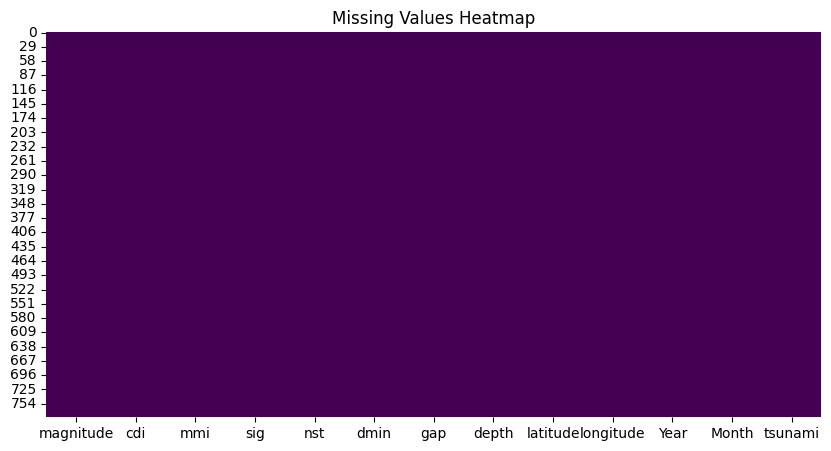

In [ ]:
 #Checking missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


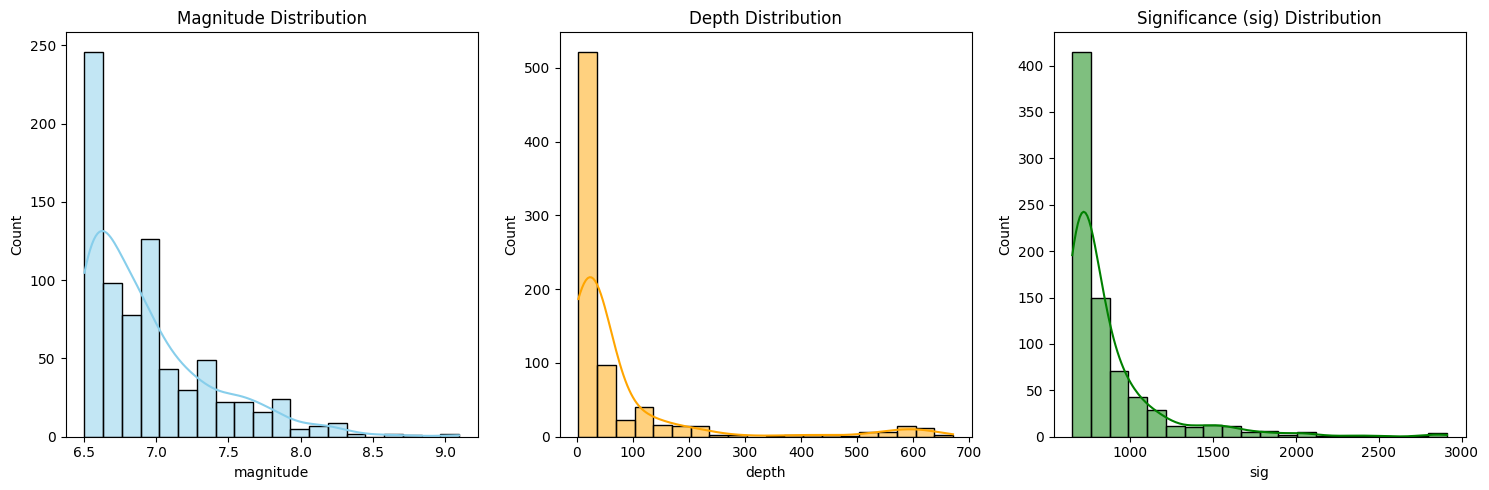

In [ ]:
#Distribution plots
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['magnitude'], bins=20, kde=True, color='skyblue')
plt.title('Magnitude Distribution')

plt.subplot(1,3,2)
sns.histplot(df['depth'], bins=20, kde=True, color='orange')
plt.title('Depth Distribution')

plt.subplot(1,3,3)
sns.histplot(df['sig'], bins=20, kde=True, color='green')
plt.title('Significance (sig) Distribution')

plt.tight_layout()
plt.show()


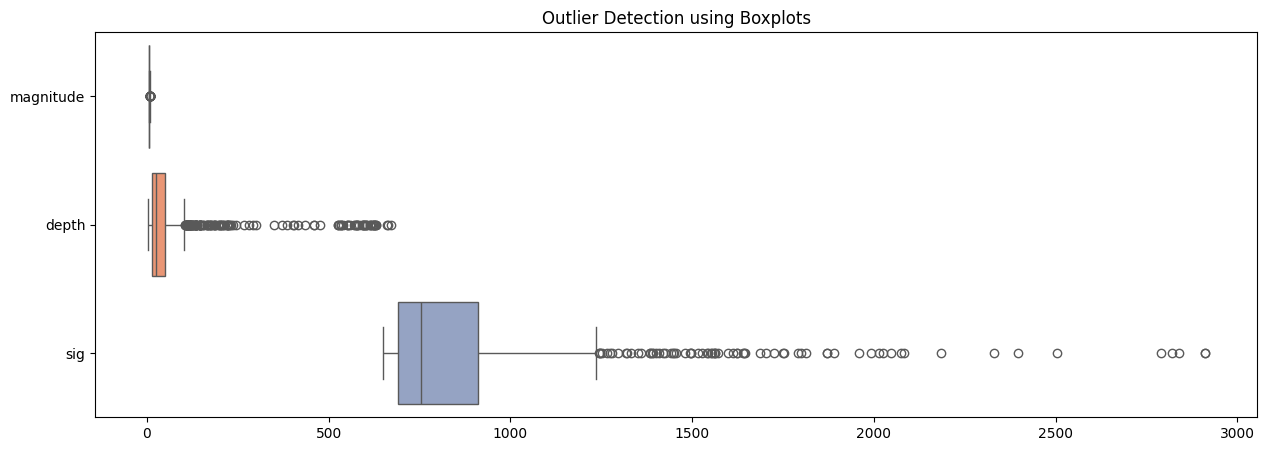

In [ ]:
# Boxplots for outlier detection
plt.figure(figsize=(15,5))

sns.boxplot(data=df[['magnitude', 'depth', 'sig']], orient='h', palette='Set2')
plt.title("Outlier Detection using Boxplots")
plt.show()


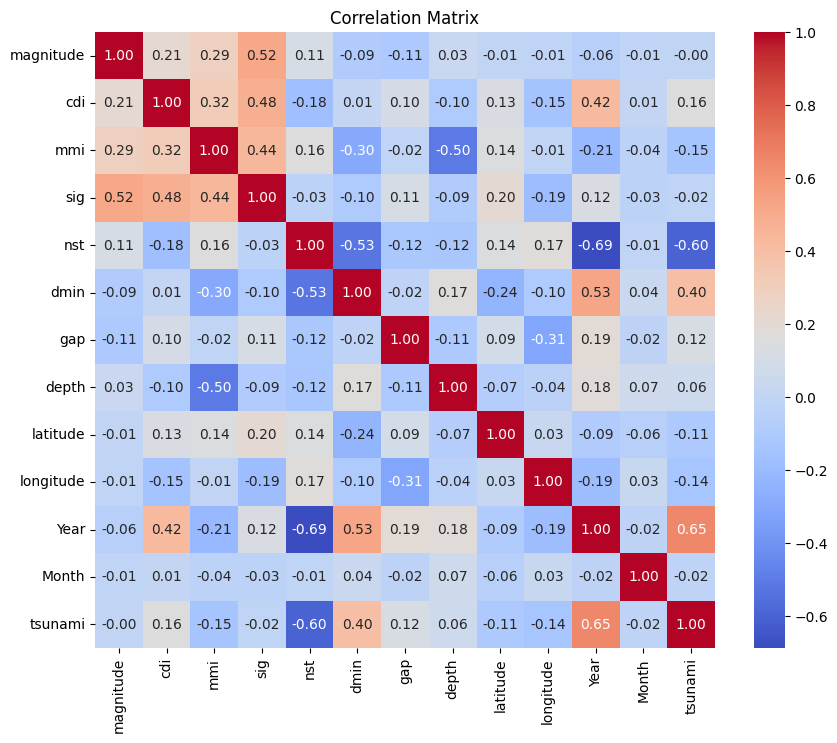

In [ ]:
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


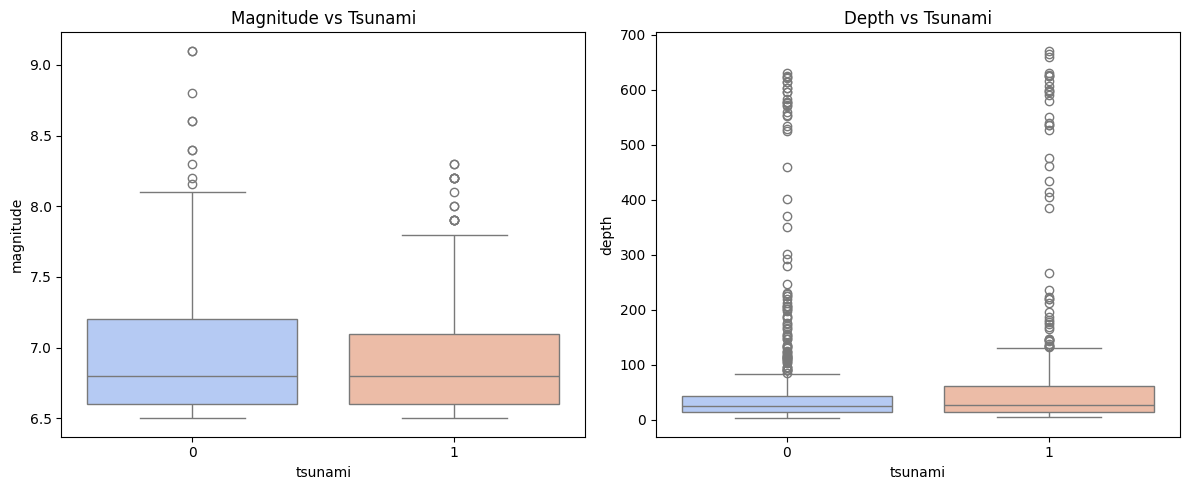

In [ ]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='tsunami', y='magnitude', hue='tsunami', data=df, palette='coolwarm', legend=False)
plt.title("Magnitude vs Tsunami")

plt.subplot(1,2,2)
sns.boxplot(x='tsunami', y='depth', hue='tsunami', data=df, palette='coolwarm', legend=False)
plt.title("Depth vs Tsunami")

plt.tight_layout()
plt.show()


<Axes: xlabel='tsunami', ylabel='count'>

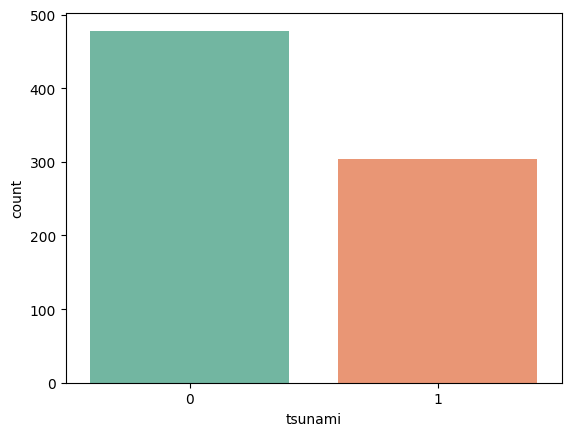

In [ ]:
sns.countplot(x='tsunami', hue='tsunami', data=df, palette='Set2', legend=False)


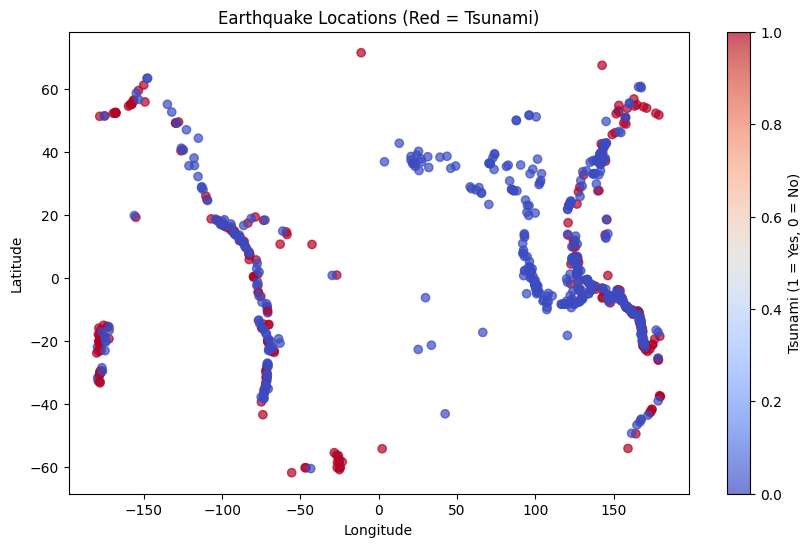

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['longitude'], df['latitude'],
            c=df['tsunami'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Tsunami (1 = Yes, 0 = No)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Locations (Red = Tsunami)')
plt.show()


In [ ]:
#Compare average magnitude and depth between tsunami and non-tsunami events
stats = df.groupby('tsunami')[['magnitude', 'depth']].mean().reset_index()
print(stats)


   tsunami  magnitude      depth
0        0   6.942803  69.667356
1        1   6.938487  85.656796


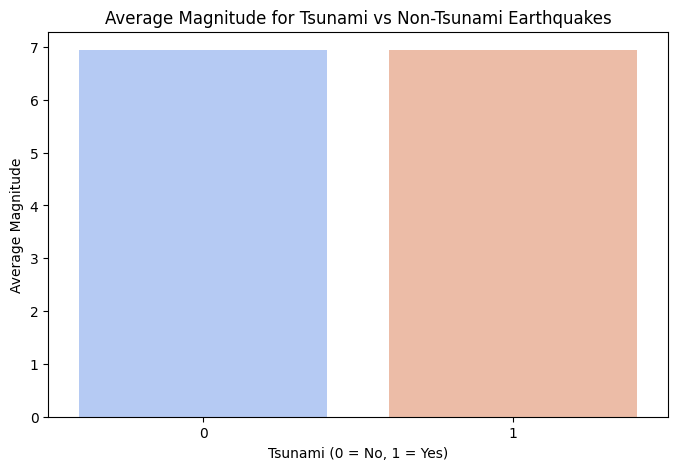

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='tsunami', y='magnitude', data=df, hue='tsunami', legend=False, palette='coolwarm', errorbar=None)
plt.title('Average Magnitude for Tsunami vs Non-Tsunami Earthquakes')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Average Magnitude')
plt.show()


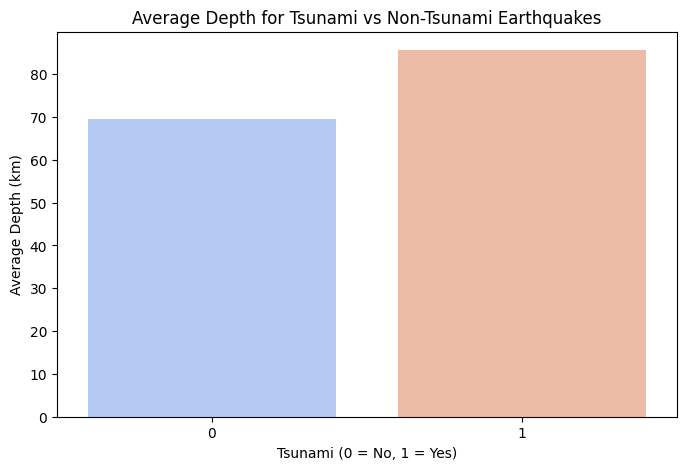

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='tsunami', y='depth', data=df, hue='tsunami', legend=False, palette='coolwarm', errorbar=None)
plt.title('Average Depth for Tsunami vs Non-Tsunami Earthquakes')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Average Depth (km)')
plt.show()
